In [63]:
import pandas as pd
import string

In [64]:
#token function
def tokenize(sentence):
    words=sentence.split()
    table= str.maketrans('','', string.punctuation)
    knives= [word.translate(table) for word in words]
    return knives

In [65]:
sentence= "Where in the world is Carmen San Diego, let's eat!"
tokens= tokenize(sentence)
print(type(tokens))

print(tokens)

<class 'list'>
['Where', 'in', 'the', 'world', 'is', 'Carmen', 'San', 'Diego', 'lets', 'eat']


In [66]:
#### Assignment 10.1.b
#N-gram function

In [67]:
def ngram(tokens, n):
    tups= zip(*[tokens[i:] for i in range(n)])
    ngrams= [''.join(tupy) for tupy in tups]
    
    return ngrams

In [68]:
tokens= tokenize(sentence)
n= 3
print(ngram(tokens, n))

['Whereinthe', 'intheworld', 'theworldis', 'worldisCarmen', 'isCarmenSan', 'CarmenSanDiego', 'SanDiegolets', 'Diegoletseat']


In [69]:
#one hot encode function
import numpy as np

In [70]:
def one_hot_encode(tokens, num_words):
    token_index= {}
    for token in tokens:
            if token not in token_index:
                token_index[token]= len(token_index)
    results= []
    for toke in tokens:
        note_array= np.zeros(shape= (len(tokens), num_words))
        note_array[token_index[toke]]= 1
        results.append(note_array)
    return results

In [71]:
tokens= tokenize(sentence)
print(one_hot_encode(tokens, 5))

[array([[1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       

In [72]:
#10.2 thru 10.4
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [73]:
imdb_path= '/home/jovyan/DSC650/data/external/imdb/aclImdb'
trainer_path= os.path.join(imdb_path, 'train')

labels= []
stuff= []

for label in ['neg', 'pos']:
    direct_name= os.path.join(trainer_path, label)
    for file in os.listdir(direct_name):
        if file[-4:]=='.txt':
            with open(os.path.join(direct_name, file)) as f:
                stuff.append(f.read())
                if label == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)

In [74]:
#tokenize
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import pad_sequences
from keras.utils.data_utils import pad_sequences
maxlen= 100
training= 500
validations= 10000
Max_verbage= 10000
tokenizer= Tokenizer(num_words= Max_verbage)
tokenizer.fit_on_texts(stuff)
sequences= tokenizer.texts_to_sequences(stuff)

word_index= tokenizer.word_index
print("We've found %s unique tokens!" % len(word_index))
datas= pad_sequences(sequences, maxlen= maxlen)
labels= np.asarray(labels)
print("The fine looking shape of the data is: ", datas.shape)
print('The fine looking shape of the declared label is: ', labels.shape)

indices= np.arange(datas.shape[0])
np.random.shuffle(indices)
datas= datas[indices]
labels= labels[indices]

x_train= datas[:training]
y_train= labels[:training]
x_validation= datas[training: training+validations]
y_validation= labels[training: training+validations]

We've found 88582 unique tokens!
The fine looking shape of the data is:  (25000, 100)
The fine looking shape of the declared label is:  (25000,)


In [75]:
embed_dimensions= 100
model= Sequential()
model.add(Embedding(Max_verbage, embed_dimensions, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer= 'rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['acc'])
history= model.fit(x_train, y_train,epochs=10,
                   batch_size= 32,
                   validation_data= (x_validation, y_validation))

Epoch 1/10
16/16 [==============================] - 2s 102ms/step - loss: 0.6938 - acc: 0.5100 - val_loss: 0.6911 - val_acc: 0.5401
Epoch 2/10
16/16 [==============================] - 1s 70ms/step - loss: 0.5719 - acc: 0.9740 - val_loss: 0.6868 - val_acc: 0.5466
Epoch 3/10
16/16 [==============================] - 1s 65ms/step - loss: 0.3566 - acc: 0.9900 - val_loss: 0.6866 - val_acc: 0.5548
Epoch 4/10
16/16 [==============================] - 1s 66ms/step - loss: 0.1544 - acc: 1.0000 - val_loss: 0.6848 - val_acc: 0.5693
Epoch 5/10
16/16 [==============================] - 1s 68ms/step - loss: 0.0642 - acc: 1.0000 - val_loss: 0.6913 - val_acc: 0.5712
Epoch 6/10
16/16 [==============================] - 1s 66ms/step - loss: 0.0283 - acc: 1.0000 - val_loss: 0.7031 - val_acc: 0.5722
Epoch 7/10
16/16 [==============================] - 1s 67ms/step - loss: 0.0148 - acc: 1.0000 - val_loss: 0.7153 - val_acc: 0.5747
Epoch 8/10
16/16 [==============================] - 1s 67ms/step - loss: 0.0086 - 

In [77]:
#Save & Plot
import matplotlib.pyplot as plt

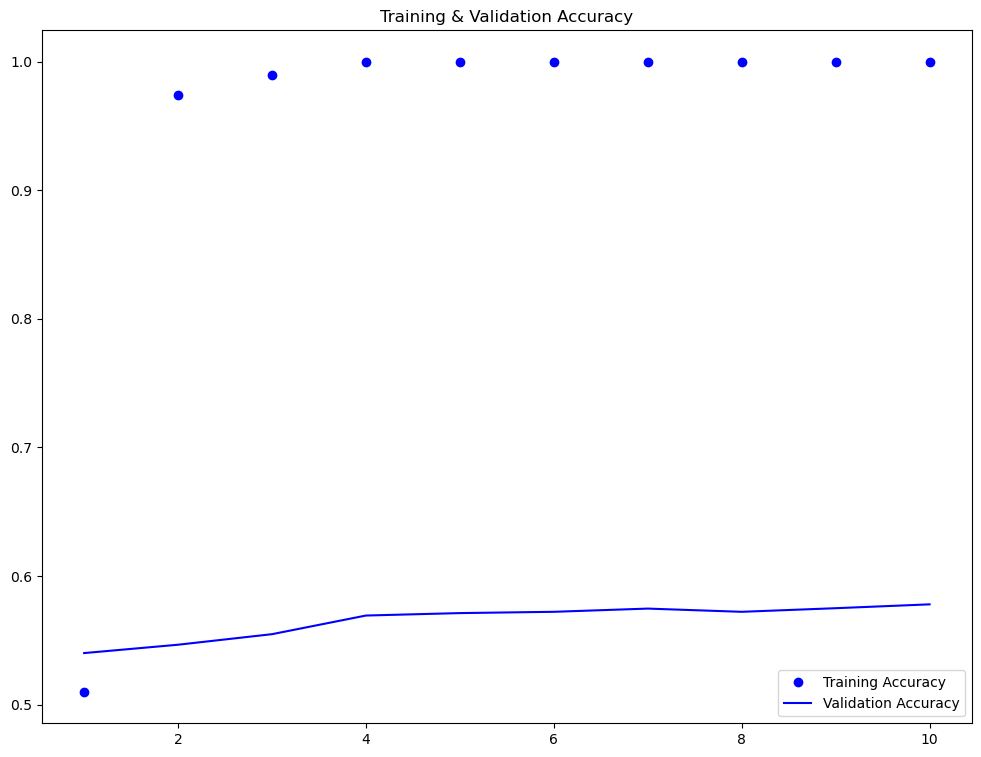

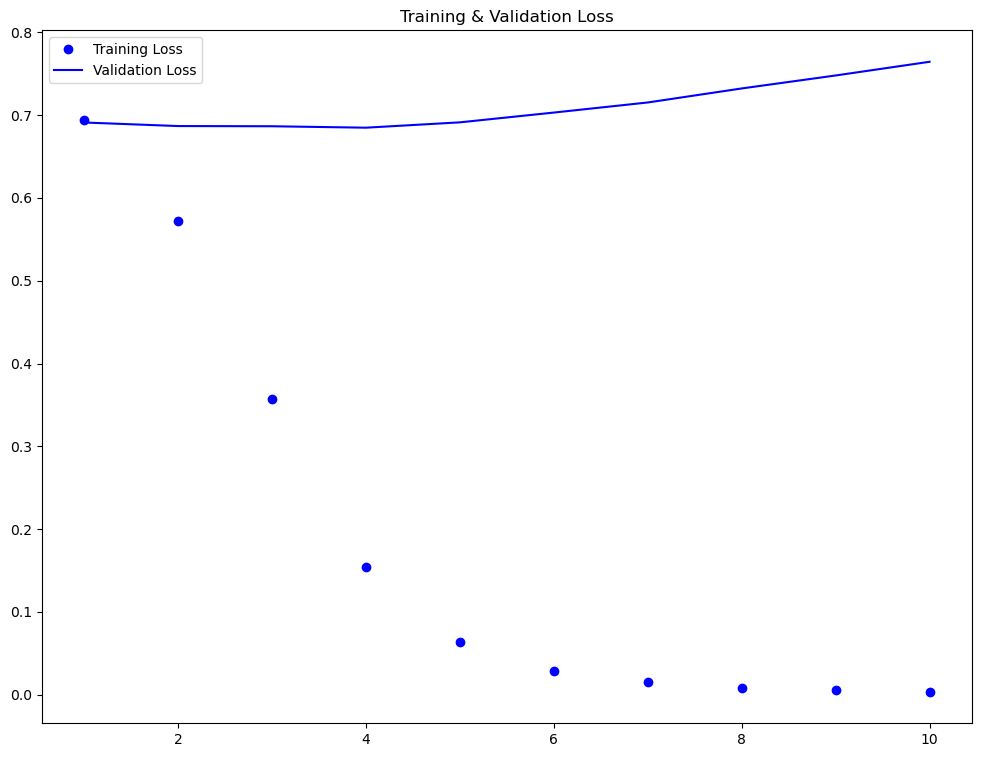

In [78]:
model.save('pre_tained_sequential_model.h5')

acc= history.history['acc']
validation_acc= history.history['val_acc']
loss= history.history['loss']
validation_loss= history.history['val_loss']
epochs= range(1, len(acc)+1)

plt.figure(figsize= (12,9))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label="Validation Accuracy")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure(figsize= (12,9))
plt.plot(epochs, loss, 'bo', label= "Training Loss")
plt.plot(epochs, validation_loss, 'b', label= "Validation Loss")
plt.title('Training & Validation Loss')
plt.legend()

plt.show();    

In [83]:
#10.3
from keras.layers import LSTM

In [92]:
from keras.datasets import imdb
#from keras.preprocessing import sequence

In [93]:
max_features= 10000
maxlen= 500
batch_size= 32

In [94]:
(input_train, y_train), (input_test, y_test)= imdb.load_data(num_words= max_features)

In [96]:
from keras.utils.data_utils import pad_sequences
input_train= pad_sequences(input_train, maxlen=maxlen)
input_test= pad_sequences(input_test, maxlen=maxlen)

In [102]:
import warnings
warnings.filterwarnings("ignore")

model= Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics= ['acc'])
history= model.fit(input_train, y_train,
                   epochs= 10,
                   batch_size= 128,
                   validation_split= 0.2)

Epoch 1/10


2023-08-02 22:06:51.791327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 22:06:51.793150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 22:06:51.795070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

157/157 [==============================] - ETA: 0s - loss: 0.6052 - acc: 0.6654

2023-08-02 22:08:03.487443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 22:08:03.489341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 22:08:03.491335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

157/157 [==============================] - 79s 484ms/step - loss: 0.6052 - acc: 0.6654 - val_loss: 0.4440 - val_acc: 0.8326
Epoch 2/10
157/157 [==============================] - 75s 479ms/step - loss: 0.3733 - acc: 0.8479 - val_loss: 0.3481 - val_acc: 0.8518
Epoch 3/10
157/157 [==============================] - 75s 480ms/step - loss: 0.2787 - acc: 0.8911 - val_loss: 0.3678 - val_acc: 0.8692
Epoch 4/10
157/157 [==============================] - 74s 474ms/step - loss: 0.2420 - acc: 0.9093 - val_loss: 0.5978 - val_acc: 0.8270
Epoch 5/10
157/157 [==============================] - 74s 473ms/step - loss: 0.2111 - acc: 0.9231 - val_loss: 0.3061 - val_acc: 0.8806
Epoch 6/10
157/157 [==============================] - 74s 469ms/step - loss: 0.1849 - acc: 0.9330 - val_loss: 0.3228 - val_acc: 0.8782
Epoch 7/10
157/157 [==============================] - 75s 475ms/step - loss: 0.1643 - acc: 0.9409 - val_loss: 0.3506 - val_acc: 0.8528
Epoch 8/10
157/157 [==============================] - 75s 476ms/st

In [103]:
model.save('pre_trained_LSTM_model.h5')

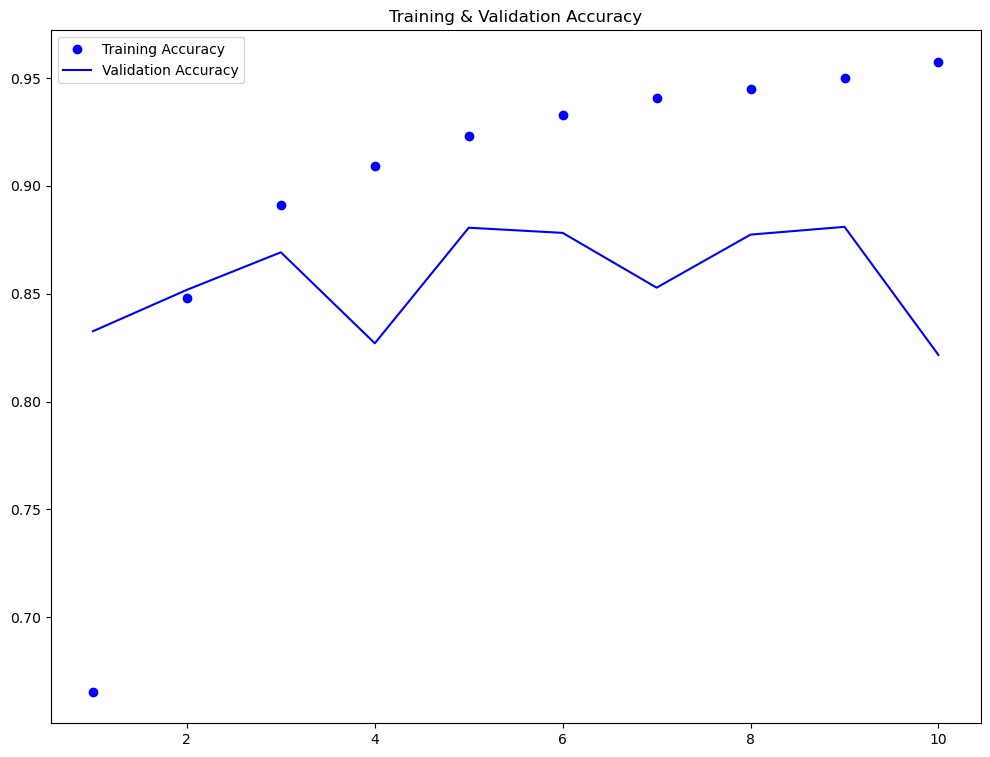

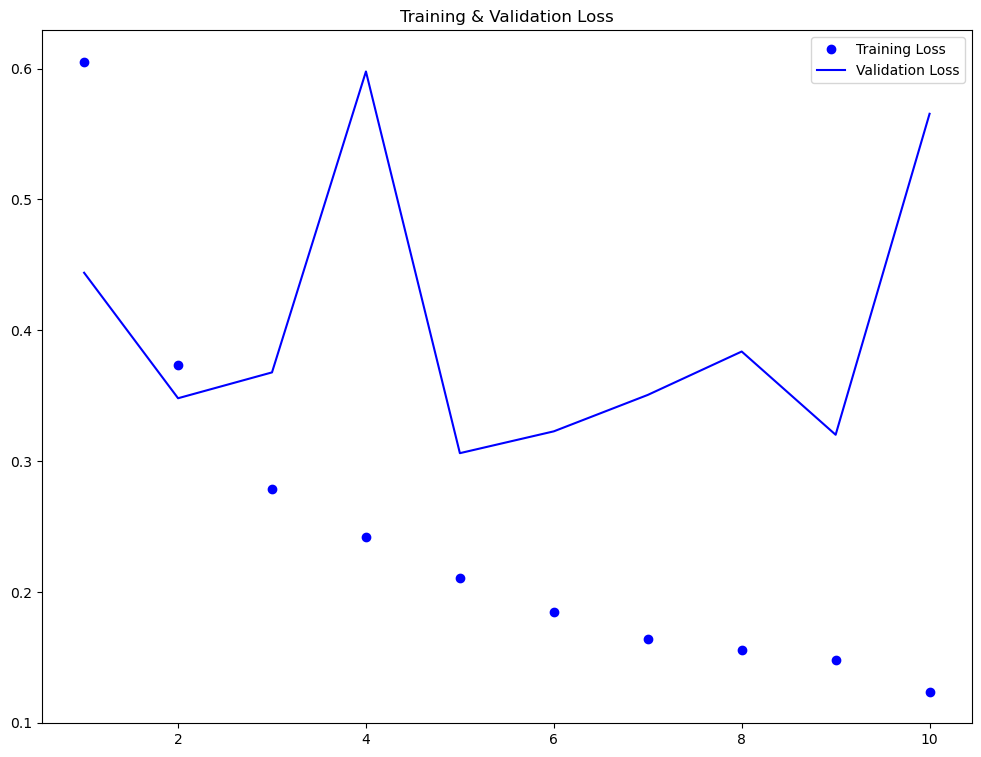

In [104]:
acc= history.history['acc']
val_acc= history.history['val_acc']
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs= range(1, len(acc)+1)

plt.figure(figsize= (12,9))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure(figsize= (12,9))
plt.plot(epochs, loss, 'bo', label= "Training Loss")
plt.plot(epochs, val_loss, 'b', label= "Validation Loss")
plt.title('Training & Validation Loss')
plt.legend()

plt.show();    

In [105]:
model.load_weights('pre_trained_LSTM_model.h5')
score= model.evaluate(x_test, y_test)
print(f'The accuracy of this model is: {round(score[1]*100,2)}%')

2023-08-02 22:21:04.023444: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-02 22:21:04.026120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-02 22:21:04.027823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

782/782 [==============================] - 20s 25ms/step - loss: 1.4656 - acc: 0.5022
The accuracy of this model is: 50.22%


In [106]:
#10.4
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [107]:
max_len= 500
max_features= 10000

(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words=max_features)

x_train= pad_sequences(x_train, maxlen=max_len)
x_test= pad_sequences(x_test, maxlen=max_len)

In [110]:
model= Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(),
              loss= 'binary_crossentropy',
              metrics= ['acc'])
history= model.fit(x_train, y_train,
                   epochs= 10,
                   batch_size= 128,
                   validation_split= 0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_11 (Dense)            (None, 1)               

In [111]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_4 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_11 (Dense)            (None, 1)               

In [112]:
model.save('pre_trained_Conv1D_model.h5')

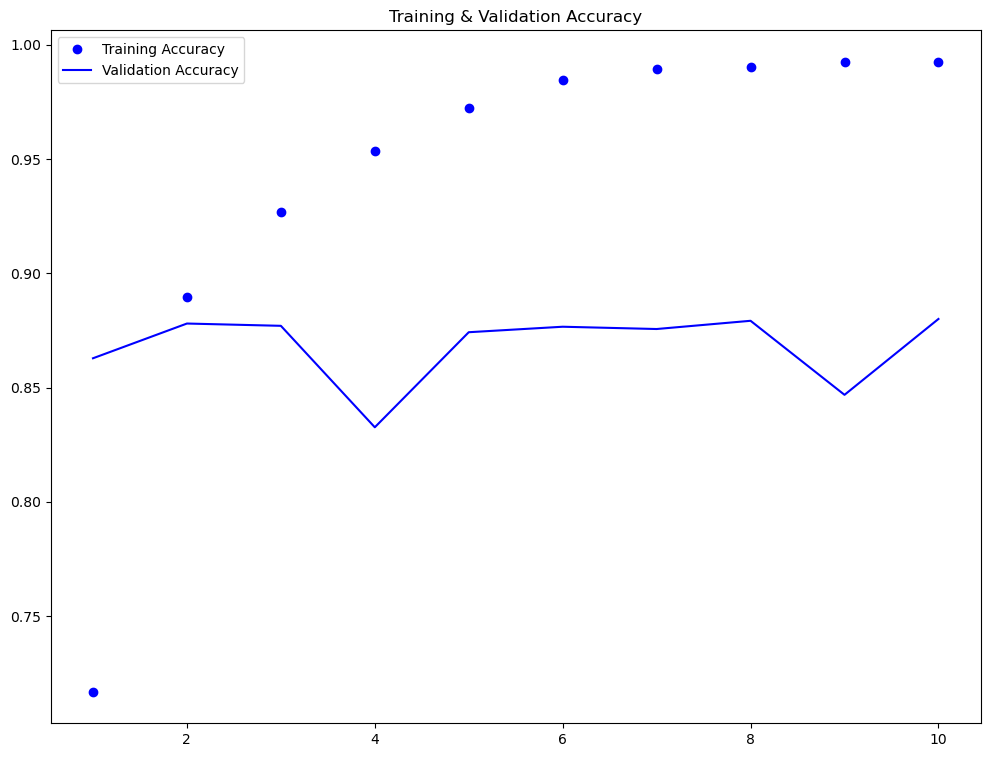

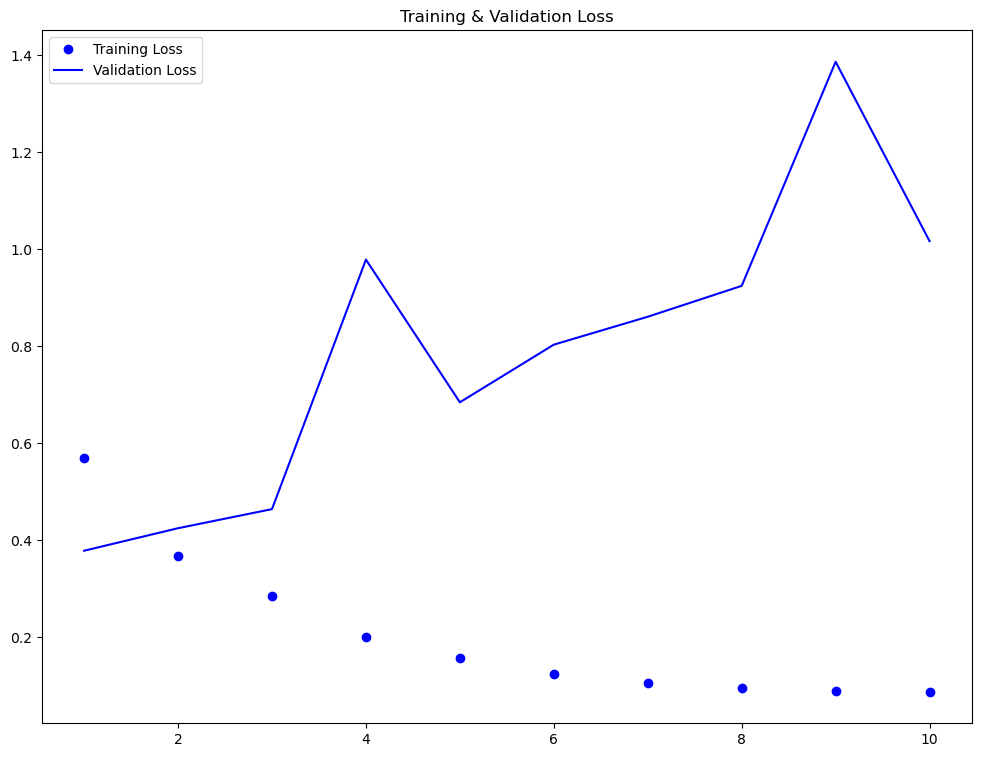

In [113]:
acc= history.history['acc']
validation_acc= history.history['val_acc']
loss= history.history['loss']
validation_loss= history.history['val_loss']
epochs= range(1, len(acc)+1)

plt.figure(figsize= (12,9))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label="Validation Accuracy")
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure(figsize= (12,9))
plt.plot(epochs, loss, 'bo', label= "Training Loss")
plt.plot(epochs, validation_loss, 'b', label= "Validation Loss")
plt.title('Training & Validation Loss')
plt.legend()

plt.show();

In [114]:
model.load_weights('pre_trained_Conv1D_model.h5')
score= model.evaluate(x_test, y_test)
print(f'The accuracy of this model is: {round(score[1]*100,2)}%')

782/782 [==============================] - 7s 8ms/step - loss: 1.1067 - acc: 0.8640
The accuracy of this model is: 86.4%
